## ❓Problem Statement


A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 



#### 🟩importing all the necessary libraries

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

### READING AND UNDERSTANDING DATA

In [135]:
data= pd.read_csv('day.csv')

In [136]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### DATA QUALITY CHECKS

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### VISUALISING CONTINUOUS VARIABLES

In [138]:
## dropping 'instant','dteday','casual','registered'

data= data.drop(columns=['instant','dteday','casual','registered'])


##### These variables were dropped since instant is the just the serial number of the record, dteday is redundant coz the required data for analysis is contained in mnth,yr casual + registered = cnt

In [139]:
## summary statistics of numerical variables
data[['temp','atemp','hum','windspeed']].describe()

,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


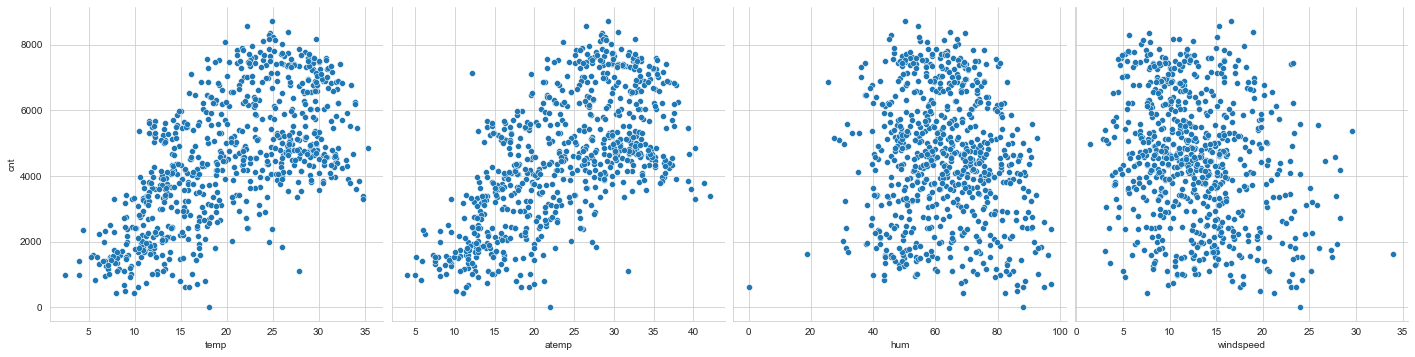

In [140]:
## Scatter plots of continous variables vs 'cnt'

sns.set_style("whitegrid")
sns.pairplot(data=data,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt',kind='scatter',height=5,aspect=1);

##### The number of rentals per day seem to be increasing with   temperature and adjusted temperature
##### adjusted temperature and temperature have similar trends
##### temp vs cnt has two outliers between 15 and 30
##### atemp vs cnt has two outliers between 20 and 35
##### hum vs cnt has two outliers below 20
##### windspeed vs cnt has one outlier above 30

### OUTLIERS IN CONTINUOUS VARIABLES VS CNT

In [141]:
## Dropping outliers in continuous variables
# outliers in temp
data = data.drop(index = data[(data['temp'] > 15) & (data['temp'] < 20) & (data['cnt'] < 100)].index)
data = data.drop(index = data[(data['temp'] > 25) & (data['temp'] < 30) & (data['cnt'] < 2000)].index)


# outliers in atemp
data = data.drop(index = data[(data['atemp'] > 20) & (data['atemp'] < 25) & (data['cnt'] < 100)].index)
data = data.drop(index = data[(data['atemp'] > 30) & (data['atemp'] < 35) & (data['cnt'] < 2000)].index)


#outliers in hum
data = data.drop(index = data[(data['hum'] < 20)].index)

#outliers in windspeed
data = data.drop(index = data[(data['windspeed'] > 30)].index)

In [142]:
# Looking at correlation with continuous variables 
correlation = data[['temp','atemp','hum','windspeed','cnt']].corr()['cnt'].apply(lambda x : round(x,4))
correlation = pd.DataFrame(correlation).sort_values(by='cnt',ascending=False)
correlation.drop(index=['cnt'],inplace=True)
# dropping registered,casual, instant
correlation.style.background_gradient(cmap='GnBu')

,cnt
atemp,0.638900
temp,0.635600
hum,-0.107600
windspeed,-0.218100


In [143]:
## correlation between 'temp' & 'atemp'
data[['temp','atemp']].corr()

,temp,atemp
temp,1.000000,0.991726
atemp,0.991726,1.000000


In [144]:
## dropping 'atemp'

data=data.drop(columns=['atemp'])

In [145]:
data[['temp','hum','windspeed']].corr()

,temp,hum,windspeed
temp,1.000000,0.122673,-0.160295
hum,0.122673,1.000000,-0.247498
windspeed,-0.160295,-0.247498,1.000000


##### There's no signifcant correlation between atemp and hum , windspeed.
##### Hence these are not dropped for now.

## VISUALISING CATEGORICAL VARIABLES

In [146]:
# Converting variables into categorical type 
data[['season','weathersit','mnth']] = data[['season','weathersit','mnth']].astype('category')

In [147]:
# Unique values in each categorical variable / [To check for disguised missing values]
cat_vars = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
for i in cat_vars : 
    print('Unique values in ',i, data[i].unique())

Unique values in  season [1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]
Unique values in  yr [0 1]
Unique values in  mnth [1, 2, 3, 4, 5, ..., 8, 9, 10, 11, 12]
Length: 12
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]
Unique values in  holiday [0 1]
Unique values in  weekday [1 2 3 4 5 6 0]
Unique values in  workingday [1 0]
Unique values in  weathersit [2, 1, 3]
Categories (3, int64): [1, 2, 3]


##### No disguised missing values exist

In [148]:
# Replacing numbers with labels 
season_labels = {
    1 : 'spring',
    2 : 'summer',
    3 : 'fall',
    4 : 'winter'
}

mnth_labels = {
    1 : 'january',
    2 : 'february',
    3 : 'march',
    4 : 'april',
    5 : 'may',
    6 : 'june',
    7 : 'july',
    8 : 'august',
    9 : 'september',
    10 : 'october',
    11 : 'november',
    12 : 'december'
}

weekday_labels = { # considering the first row of dteday to be 01-01-2011
    0 : 'Sunday',
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'Wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Saturday'
}

weathersit_labels = {
    1 : 'clear',
    2 : 'cloudy',
    3 : 'light snow/rain'
}

# replacing numerals with labels 
data['season'] = data['season'].replace(season_labels)
data['mnth'] = data['mnth'].replace(mnth_labels)
data['weekday'] = data['weekday'].replace(weekday_labels)
data['weathersit'] = data['weathersit'].replace(weathersit_labels)

data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,january,0,Monday,1,cloudy,14.110847,80.5833,10.749882,985
1,spring,0,january,0,Tuesday,1,cloudy,14.902598,69.6087,16.652113,801
2,spring,0,january,0,Wednesday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,january,0,Thursday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,january,0,Friday,1,clear,9.305237,43.6957,12.522300,1600


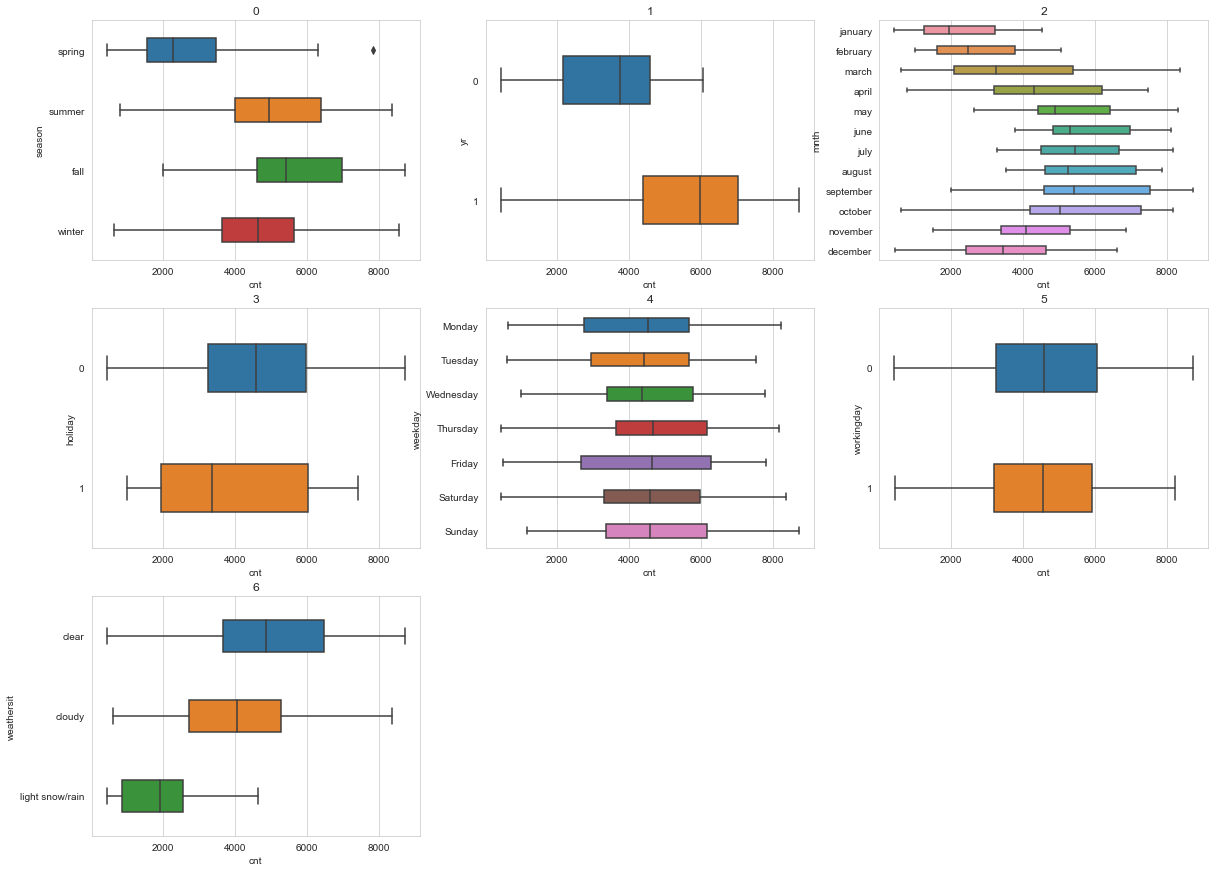

In [149]:
cat_vars = ['season','yr','mnth','holiday','weekday',  'workingday','weathersit']
data1 = data[cat_vars]
data1.loc[:,'cnt'] = data['cnt'].values
data1[['yr','holiday','workingday']] = data1[['yr','holiday','workingday']].astype('category')
plot_dim = [3,3]
fig,axs = plt.subplots(*plot_dim)
fig.set_figheight(15)
fig.set_figwidth(20)
for i in range(plot_dim[0]) :  
    for j in range(plot_dim[1]) :
        axs[i,j].set(title = i*plot_dim[1]+j)
        sns.boxplot(data=data1,x='cnt',y=cat_vars[i*plot_dim[1]+j],width=0.4,ax=axs[i,j])
        if i*plot_dim[1]+j == 6 : 
            break
axs[2,1].set_axis_off()
axs[2,2].set_axis_off()

##### From the season vs rentals per day plot , fall has the highest average rentals followed by summer.
##### Looking at year by year rentals, 2019 has had a median 2000 increase in rentals compared to 2018.
##### From the month wise plot, September has the highest rentals, followed by the two months surrounding it. It seems like the trend is explained by seasonal rentals too
##### Holidays show lower rental count compared to working days, with greater variability in demand on holidays.
##### There is no significant difference between rentals vs weekdays, except that Thursdays and sundays have a higher variation in rentals than others.

### OUTLIERS IN CATEGORICAL VARIABLES VS CNT

In [150]:
# Dropping outliers in Categorical Variables 
data = data.drop(index = data[(data['season'] == 'spring') & (data['cnt'] > 7000)].index)

#### CORRELATION

<AxesSubplot:>

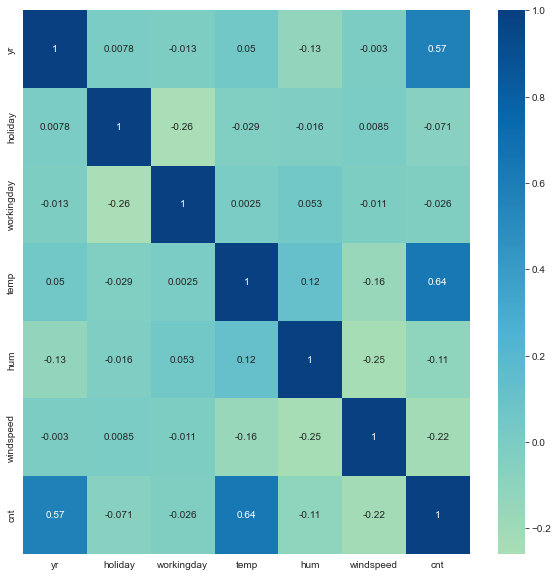

In [151]:
# correlation among variables
plt.figure(figsize=[10,10])
sns.heatmap(data.corr(),cmap='GnBu',center=0,annot=True)

###### Highest correlation with cnt is seen in temp followed by yr

### CREATING INDICATOR VARIABLES

In [152]:
# creating indicator variable columns
season_indicators = pd.get_dummies(data['season'],drop_first=True)
mnth_indicators = pd.get_dummies(data['mnth'],drop_first=True)
weekday_indicators = pd.get_dummies(data['weekday'],drop_first=True)
weathersit_indicators = pd.get_dummies(data['weathersit'],drop_first=True)

In [153]:
# adding indicator variable columns to the dataset . Dropping original columns
data = pd.concat([data,season_indicators,mnth_indicators,weekday_indicators,weathersit_indicators],axis=1)
data = data.drop(columns=['season','mnth','weekday','weathersit'])

In [154]:
data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,november,december,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,cloudy,light snow/rain
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'summer', 'fall', 'winter', 'february', 'march', 'april', 'may', 'june',
       'july', 'august', 'september', 'october', 'november', 'december',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'cloudy', 'light snow/rain'],
      dtype='object')

#### SPLITTING THE DATA SET INTO TEST & TRAIN SUBSETS

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
dtrain,dtest = train_test_split(data,train_size=0.7,test_size=0.3,random_state=120)

### SCALING NUMERICAL FEATURES

In [158]:
# normalisation of continuous variables
from sklearn.preprocessing import MinMaxScaler
numerical_scaler=MinMaxScaler()
num_vars=['temp','hum','windspeed']

numerical_scaler.fit(dtrain[num_vars])
dtrain[num_vars]=numerical_scaler.transform(dtrain[num_vars])

### X_train, y_train

In [159]:
y_train=dtrain.pop('cnt')
X_train=dtrain

In [160]:
y_train.head()

231    5191
717    5267
107    3429
595    4549
485    5740
Name: cnt, dtype: int64

In [161]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,summer,fall,winter,february,...,november,december,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,cloudy,light snow/rain
231,0,0,1,0.795440,0.584687,0.155696,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
717,1,0,1,0.340632,0.516822,0.355128,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
107,0,0,1,0.564921,0.401392,0.303720,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
595,1,0,1,0.718600,0.636891,0.110569,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
485,1,0,1,0.690564,0.564384,0.285008,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [162]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'fall', 'winter', 'february', 'march', 'april', 'may', 'june', 'july',
       'august', 'september', 'october', 'november', 'december', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'cloudy',
       'light snow/rain'],
      dtype='object')

## Modelling

Approach 
- A mixed approach is followed
- 15 best columns are chosen using RFE
- And then p_value method is followed for further elimination.

#### Recrusive Feature elimination

In [163]:
# Selecting 15 Features using RFE 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr_estimator = LinearRegression()
rfe = RFE(lr_estimator,n_features_to_select=15, step=1)
selector = rfe.fit(X_train,y_train)

In [164]:
# RFE Feature Ranking
rfe_ranking = pd.DataFrame({'rank' : selector.ranking_, 'support': selector.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
0,1,True,yr
22,1,True,Sunday
21,1,True,Saturday
17,1,True,october
16,1,True,september
14,1,True,july
26,1,True,cloudy
8,1,True,winter
27,1,True,light snow/rain
6,1,True,summer


In [165]:
# Selection Features
selected_features=rfe_ranking.loc[rfe_ranking['rank']==1,'features'].values
selected_features

array(['yr', 'Sunday', 'Saturday', 'october', 'september', 'july',
       'cloudy', 'winter', 'light snow/rain', 'summer', 'windspeed',
       'hum', 'temp', 'fall', 'workingday'], dtype=object)

### MANUAL ELIMINATION

In [166]:
# following a stepwise elimination

import statsmodels.api as sm
def ols_fit(y,x):
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(y,X_train_sm).fit()
    print(model.summary())
    return model
def vif(X) : 
    df = sm.add_constant(X)
    vif = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif_frame = pd.DataFrame({'vif' : vif[0:]},index = df.columns).reset_index()
    print(vif_frame.sort_values(by='vif',ascending=False))
    

#### MODEL 1

- using features selected by RFE : 'yr', 'Sunday', 'Saturday', 'november', 'january', 'december',
 'winter', 'july', 'spring', 'holiday', 'workingday', 'hum', 'temp',
 'windspeed', 'light snow/rain'

In [ ]:
features_1 = selected_features
ols_fit(y_train, X_train[features_1])

                  OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     189.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          9.27e-188
Time:                        06:36:30   Log-Likelihood:                -4072.4
No. Observations:                 506   AIC:                             8175.
Df Residuals:                     491   BIC:                             8238.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2278.2820    192.838     11.815      0.000    1899.393    2657.171
yr               1959.7590     69.543     28.180      0.000    1823.120    2096.398
Sunday            497.0421     97.123      5.118      0.000     306.214     687.871
Saturday          874.2613     95.093      9.194      0.000     687.422    1061.101
november         -617.4927    158.994     -3.884      0.000    -929.885    -305.100
january          -391.9320    149.160     -2.628      0.009    -685.002     -98.862
december         -475.8630    142.634     -3.336      0.001    -756.112    -195.614
winter            687.2832    121.588      5.653      0.000     448.387     926.180
july             -804.3128    141.415     -5.688      0.000   -1082.166    -526.459
spring          -1010.6061    134.437     -7.517      0.000   -1274.749    -746.464
holiday           165.4153    160.101      1.033      0.302    -149.152     479.982
workingday        741.5633     73.655     10.068      0.000     596.846     886.280
hum             -1782.6033    198.667     -8.973      0.000   -2172.947   -1392.260
temp             4036.2727    275.497     14.651      0.000    3494.974    4577.571
windspeed       -1167.6983    188.628     -6.190      0.000   -1538.315    -797.081
light snow/rain -1276.7947    234.425     -5.446      0.000   -1737.395    -816.194
==============================================================================
Omnibus:                       74.940   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.191
Skew:                          -0.800   Prob(JB):                     2.22e-36
Kurtosis:                       5.286   Cond. No.                     6.67e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.03e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.

<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fcbf5cdae50>





### Model 2 : Dropping holiday because of high p-value


In [ ]:
del_feature = 'holiday'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

### Model 3 : Dropping Sunday because of high p-value

In [ ]:
del_feature = 'Sunday'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

### Model 4: Dropping january because this information might also be contained in winter

In [ ]:
del_feature = 'january'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

### Model 5:Dropping december because this information might also be contained in winter.

In [ ]:
del_feature = 'december'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

### Model 6: Dropping november because this information might also be contained in winter.

In [ ]:
del_feature = 'november'
selected_features = selected_features[selected_features!=del_feature]
final_model = ols_fit(y_train,X_train[selected_features])

In [173]:
vif(X_train[selected_features])

              index        vif
0             const  32.876533
13             fall   5.498262
12             temp   3.941079
9            summer   2.747039
11              hum   2.299608
7            winter   2.177147
6            cloudy   1.797689
14       workingday   1.674259
2          Saturday   1.656346
5              july   1.590544
3           october   1.532294
8   light snow/rain   1.407098
4         september   1.370542
10        windspeed   1.212160
1                yr   1.042242


### Final Model

In [ ]:
final_model = ols_fit(y_train,X_train[selected_features])

OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     252.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.89e-187
Time:                        06:36:31   Log-Likelihood:                -4085.3
No. Observations:                 506   AIC:                             8193.
Df Residuals:                     495   BIC:                             8239.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2392.0791    242.318      9.872      0.000    1915.980    2868.178
yr               1946.7864     70.967     27.432      0.000    1807.353    2086.220
Saturday          444.4907    126.045      3.526      0.000     196.842     692.139
winter            466.0136    109.450      4.258      0.000     250.970     681.057
july             -890.3115    143.244     -6.215      0.000   -1171.752    -608.871
spring          -1063.6669    132.613     -8.021      0.000   -1324.220    -803.114
workingday        296.8008     95.388      3.112      0.002     109.386     484.216
hum             -1749.8275    201.947     -8.665      0.000   -2146.607   -1353.048
temp             4471.6602    262.111     17.060      0.000    3956.673    4986.648
windspeed       -1110.3191    191.742     -5.791      0.000   -1487.049    -733.590
light snow/rain -1273.7519    239.422     -5.320      0.000   -1744.160    -803.344
==============================================================================
Omnibus:                       69.587   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.276
Skew:                          -0.788   Prob(JB):                     2.56e-30
Kurtosis:                       4.995   Cond. No.                         16.5
==============================================================================


Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


-10 features have been selected.

-All the features are statistically significant [low p-value]

-The model over is a good fit with Prob (F-statistic): 4.89e-187

-The model explains 83.6% variability in the training data. Adjusted R-square being 83.3%

### RESIDUAL ANALYSIS

In [ ]:
# Residual Analysis of Trained Data
X_train_sm = sm.add_constant(X_train[selected_features])

y_train_pred = final_model.predict(X_train_sm)
fig,ax = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(16)

ax[0].set(title='Frequency Distribution of Residuals')
sns.distplot(y_train-y_train_pred, bins=30, ax=ax[0])

ax[1].set(title='Predicted Values vs Residuals')
\
sns.regplot(y_train_pred,y_train-y_train_pred,ax=ax[1])
plt.show()

In [180]:
# Mean of Residuals
(y_train).mean()

4419.658102766798

-Residual errors follow a normal distribution with mean=0

-Variance of Errors doesnt follow any trends

-Residual errors are independent of each other since the Predicted values vs Residuals plot doesn't show any trend.

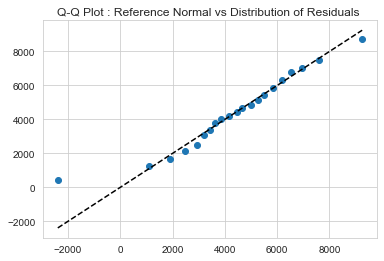

In [179]:
# Verifying the normality of distribution of residuals 
mean = (y_train).mean()
std = (y_train).std()

ref_normal = np.random.normal(mean,std,(y_train).shape[0])


percs = np.linspace(0,100,21)
qn_ref_normal = np.percentile(ref_normal, percs)
qn_residual = np.percentile(y_train , percs)

plt.plot(qn_ref_normal,qn_residual, ls="", marker="o")

x = np.linspace(np.min((qn_ref_normal.min(),qn_residual.min())), np.max((qn_ref_normal.max(),qn_residual.max())))
plt.plot(x,x, color="k", ls="--")
plt.title('Q-Q Plot : Reference Normal vs Distribution of Residuals ')
plt.show()


-This plot further shows that the residual distribution is approximately normal for all test data with values within range of training data. Extrapolated points show significant predict inaccuracy.

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

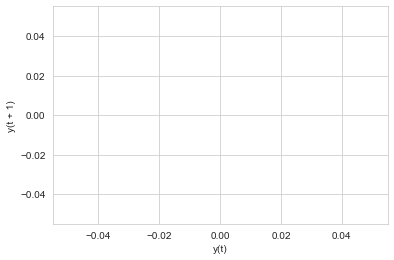

In [184]:
# lag plot to assess independence of data points
from pandas.plotting import lag_plot
lag_plot(y_train-y_train_pred)

-Lagplot of residuals shows no trend. Hence the error terms have constant variance
#### Hence, assumptions of Linear Regression are satisfied by this model

### PREDICTION

In [185]:
y_test = dtest.pop('cnt')
X_test = dtest
X_test[num_vars] = numerical_scaler.transform(X_test[num_vars])
X_test = X_test[selected_features]

In [ ]:
X_test = sm.add_constant(X_test)
y_test_pred = final_model.predict(X_test)

### MODEL EVALUATION

NameError: name 'y_test_pred' is not defined

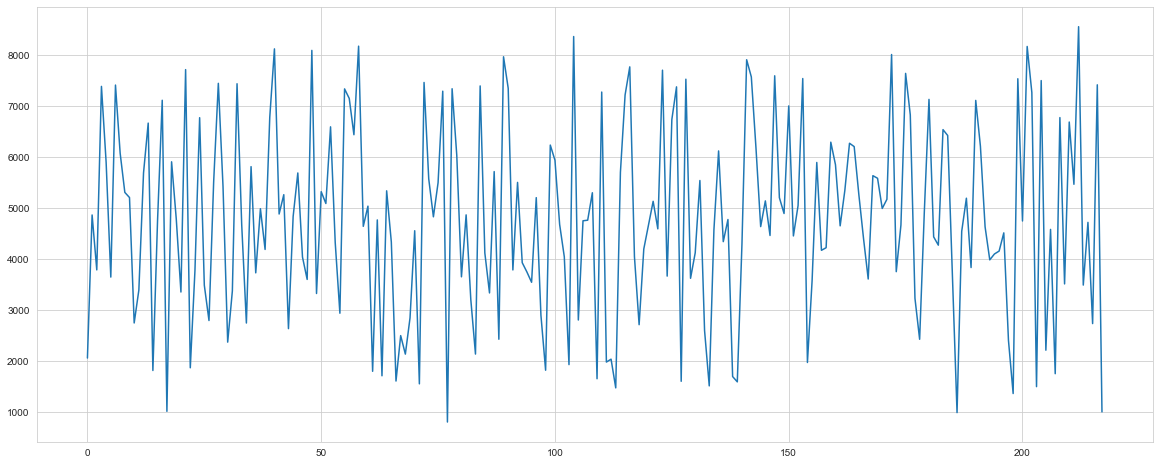

In [193]:
# Plotting Actual vs Predicted No of rentals 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_test_pred)),y_test_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Rentals');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()

plt.figure(figsize=[8,8])
plt.scatter(y_test,y_test_pred);
plt.title('Predicted vs Actual No of Rentals');

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_test_pred)
rsquared_test = r2_score(y_test, y_test_pred)
rsquared_train = r2_score(y_train, y_train_pred)
print('R-squared for train data:',round(rsquared_train,2))
print('R-squared for test data:',round(rsquared_test,2))
print('Mean Squared Error',round(mse,3))

R-squared for train data: 0.84

R-squared for test data: 0.81

Mean Squared Error 666097.695

### MODEL STABILITY

In [197]:
# R-square using cross validation

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
clr = cross_val_score(lr,X_train[selected_features],y_train,cv=10, scoring='r2')
clr

array([0.80143711, 0.90145798, 0.75608675, 0.89772543, 0.83827587,
       0.86347784, 0.86752598, 0.71417946, 0.72519603, 0.86476577])

In [198]:
print("R-square at 0.95 confidence level : %0.2f (+/- %0.2f)" % (clr.mean(), clr.std() * 2))

R-square at 0.95 confidence level : 0.82 (+/- 0.13)


In [199]:
selected_features

array(['yr', 'Saturday', 'october', 'september', 'july', 'cloudy',
       'winter', 'light snow/rain', 'summer', 'windspeed', 'hum', 'temp',
       'fall', 'workingday'], dtype=object)

### TOP FEATURES

In [200]:
# standardizing numerical variables 

from sklearn.preprocessing import StandardScaler
reg_features = selected_features
scaler = StandardScaler()
data = X_train[selected_features]
std_num = scaler.fit(data[['temp','windspeed','hum']])


std_X_train = pd.DataFrame(data = scaler.transform(data[['temp','windspeed','hum']]), columns=['temp','windspeed','hum'])
for i in reg_features : 
    std_X_train[i] = data[i].values


reshaped_y_train = y_train.values.reshape(-1,1)

# Fitting linear regression model 
std_model = lr.fit(std_X_train, reshaped_y_train)

# Coefficients and intercept
result = pd.DataFrame(data = std_model.coef_, columns = std_X_train.columns, index=['MLR Coefficients']).T
result = result.sort_values(by='MLR Coefficients',ascending=False)
print('\nIntercept :',std_model.intercept_)
result


Intercept : [1486.98749234]


,MLR Coefficients
temp,4234.263716
yr,1963.214158
winter,1280.737407
summer,1172.381346
fall,875.171182
october,597.986062
september,597.626782
Saturday,70.766034
workingday,35.500675
cloudy,-390.202368


-Upon standardized the values of predictor variables, the above shows that the top features influencing demand are temp, followed by yr and hum

-In case of continuous variables, the above data could be interpreted as - With every standard deviation increase in continuous variables, demand increases by xxx, when all other modelled paramters are held unchanged.

-In case of categorical variables, the above data could be interpreted as - Compared to the reference level, the change in demand is xxx,, when all other modelled paramters are held unchanged.

### CONCLUSION

Analysis is carried out using a Mixed Feature Selection Approach. 15 features are selected algorithmically using Recursive Feature Elimination. Further selection is done manually by looking at multicollinearity and statistical significance of features and overall fit of the model. The 10 most significant features to understand demand have been reported.

The data set is randomly divided into training and test data. Final Model built on training data set explains 84% of the variability and achieves 81% on test data.
The final relationship between demand and predictors is as follows.

-cnt = 2392.0791 + 1946.7864 yr + 444.4907 Saturday + 466.0136 winter - 890.3115 july -1063.6669 spring + 296.8008 workingday - 1749.8275 hum + 4471.6602 temp - 1110.3191 windspeed - 1273.7519 light snow/rain

where temp , windspeed and hum are normalized.

Note :

-Data has been cleaned to drop outliers that might affect the model adversely

-The model has been verified for Multicollinearity effects.
Residual Analysis has been carried out and the model satisfies the assumptions of Linear Regression (Residuals follow a normal distribution, Errors exhibit homoscedasticity)

-Q-Q plot between residual distribution and normal distribution shows that residuals follow a normal distribution for all interpolations. Extraplorations show significant deviation, not affecting Linear Regression applicability.

-Further Lag plot shows there is no auto-correlation in data.
Model is stable at 81%(+/-14%) coefficient of determination at 95% CI, ascertained through cross validation.

-Features in the order of influence has been reported by standardizing all predictor values.